## Elipsoide_Clark_FAT_Esfera_Triaxial_Prolate

## Coisas para importar

In [14]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt

from fatiando import mesher, gridder, utils
from fatiando.vis import mpl
from fatiando.gravmag import sphere
from fatiando import mesher, gridder, utils
from fatiando.vis import mpl

import scipy.special
import scipy.interpolate

%matplotlib inline

## Importar minhas funções de um arquivo externo

In [15]:
import Elipsoide_Clark_FAT_Unificado as me5

#### Fatiando a Terra - Ellipsoid

In [16]:
# Malha coordenadas geograficas
xmin = -100.
xmax = 100.
ymin = -90.
ymax = 90.
Nx = 200
Ny = 200

#xc posicao x , yc posição y e zc profundidade reais
xc = 0
yc = 0
zc = 150.

# Orientacoes do elipsoide
azimuth = np.deg2rad(0.)
delta = np.deg2rad(0.)
gamma = np.deg2rad(0.)

# Eixos do elipsoide
a = 20.1
b = 20.
c = 19.9

# Create a regular grid at 0m height
shape = (Nx, Ny)
area = [xmin, xmax, ymin, ymax]
Xp, Yp, Zp = gridder.regular(area, shape, z=0.)

# Set the inclination and declination of the regional field
inten, inc, dec  = 30000., np.deg2rad(52.46), np.deg2rad(75.20)

################################################################################################################################
################################################################################################################################
model1 = []
# Create a ellipsoid model (Triaxial)
model1.append(me5.Ellipsoid(Xp, Yp, Zp, xc, yc, zc, a, b, c, azimuth, delta, gamma, 
                          {'remanence': np.array([10000, np.deg2rad(45.), np.deg2rad(26.84)]),
                           'k1': np.array([(0.01), np.deg2rad(90.), np.deg2rad(0.)]),
                           'k2': np.array([(0.01), np.deg2rad(180.), np.deg2rad(0.)]),
                           'k3': np.array([(0.01), np.deg2rad(0.), np.deg2rad(90.)])}
                          ))

################################################################################################################################
################################################################################################################################
model2 = []
# Create a ellipsoid model (Prolate)
model2.append(me5.Ellipsoid(Xp, Yp, Zp, xc, yc, zc, a, b, b, azimuth, delta, gamma, 
                          {'remanence': np.array([10000, np.deg2rad(45.), np.deg2rad(26.84)]),
                           'k1': np.array([(0.01), np.deg2rad(90.), np.deg2rad(0.)]),
                           'k2': np.array([(0.01), np.deg2rad(180.), np.deg2rad(0.)]),
                           'k3': np.array([(0.01), np.deg2rad(0.), np.deg2rad(90.)])}
                          ))

################################################################################################################################
################################################################################################################################
model3 = []  #Sphere
# Create a sphere model
model3 = [mesher.Sphere(xc, yc, zc, b, {'magnetization': utils.ang2vec(99.0268380547222, 46.5895841095482, 28.1107490096355)})]

In [17]:
# Calculate the anomaly for a given regional field (Triaxial)
JRD_cart = me5.jrd_cartesiano (inten,inc,dec,model1)
Bx = me5.bx_c (Xp,Yp,Zp,inten,inc,dec,model1)
By = me5.by_c (Xp,Yp,Zp,inten,inc,dec,model1)
Bz = me5.bz_c (Xp,Yp,Zp,inten,inc,dec,model1)
Tf = me5.tf_c (Xp,Yp,Zp,inten,inc,dec,model1)

Bx = np.reshape(Bx, shape)
By = np.reshape(By, shape)
Bz = np.reshape(Bz, shape)
Tf = np.reshape(Tf, shape)

# Calculate the anomaly for a given regional field (Prolate)
JRD_cart2 = me5.jrd_cartesiano (inten,inc,dec,model2)
Bx2 = me5.bx_c (Xp,Yp,Zp,inten,inc,dec,model2)
By2 = me5.by_c (Xp,Yp,Zp,inten,inc,dec,model2)
Bz2 = me5.bz_c (Xp,Yp,Zp,inten,inc,dec,model2)
Tf2 = me5.tf_c (Xp,Yp,Zp,inten,inc,dec,model2)

Bx2 = np.reshape(Bx2, shape)
By2 = np.reshape(By2, shape)
Bz2 = np.reshape(Bz2, shape)
Tf2 = np.reshape(Tf2, shape)

# Calculate the anomaly for a given regional field (Sphere)
Tf3 = sphere.tf(Xp, Yp, Zp, model3, inc, dec)
Bx3 = sphere.bx(Xp, Yp, Zp, model3)
By3 = sphere.by(Xp, Yp, Zp, model3)
Bz3 = sphere.bz(Xp, Yp, Zp, model3)

#Tf3 = np.reshape(Tf3, shape)
Bx3 = np.reshape(Bx3, shape)
By3 = np.reshape(By3, shape)
Bz3 = np.reshape(Bz3, shape)

In [18]:
JRD_cart

[[9902.6838054722248, 46.589584109548191, 28.110749009635544]]

## Resultado da minha função

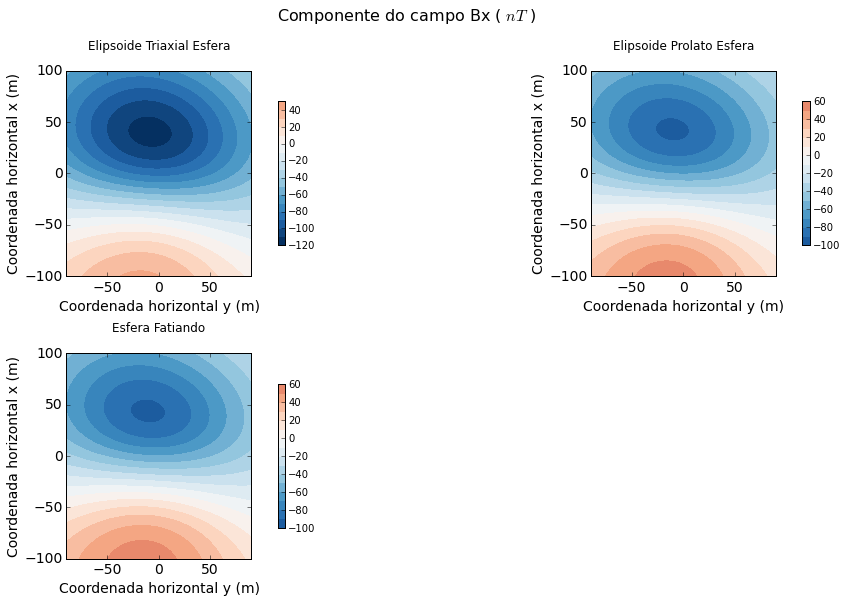

In [19]:
rangesBx = np.max(np.abs([np.max(Bx), np.min(Bx),
                          np.max(Bx2), np.min(Bx2),
                          np.max(Bx3), np.min(Bx3)]))

plt.figure(figsize=(15,8))

plt.suptitle('Componente do campo Bx ( $nT$ )',y=1.04, fontsize=16, x=0.55)

plt.subplot(2,2,1)
plt.title('Elipsoide Triaxial Esfera', y=1.08)
plt.axis('scaled')
mpl.contourf(Yp,Xp,Bx,shape,15,
            vmin = -rangesBx, vmax = rangesBx,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.subplot(2,2,2)
plt.title('Elipsoide Prolato Esfera', y=1.08)
plt.axis('scaled')
mpl.contourf(Yp,Xp,Bx2,shape,15,
            vmin = -rangesBx, vmax = rangesBx,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.subplot(2,2,3)
plt.title('Esfera Fatiando', y=1.08)
plt.axis('scaled')
mpl.contourf(Yp,Xp,Bx3,shape,15,
            vmin = -rangesBx, vmax = rangesBx,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.tight_layout()

plt.show()

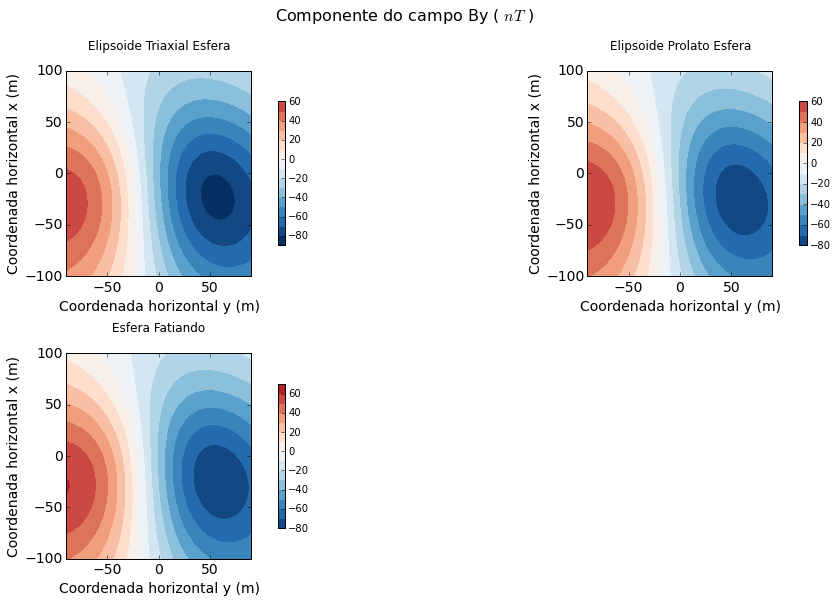

In [20]:
rangesBy = np.max(np.abs([np.max(By), np.min(By),
                          np.max(By2), np.min(By2),
                          np.max(By3), np.min(By3)]))

plt.figure(figsize=(15,8))

plt.suptitle('Componente do campo By ( $nT$ )',y=1.04, fontsize=16, x=0.55)

plt.subplot(2,2,1)
plt.title('Elipsoide Triaxial Esfera', y=1.08)
plt.axis('scaled')
mpl.contourf(Yp,Xp,By,shape,15,
            vmin = -rangesBy, vmax = rangesBy,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.subplot(2,2,2)
plt.title('Elipsoide Prolato Esfera', y=1.08)
plt.axis('scaled')
mpl.contourf(Yp,Xp,By2,shape,15,
            vmin = -rangesBy, vmax = rangesBy,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.subplot(2,2,3)
plt.title('Esfera Fatiando', y=1.08)
plt.axis('scaled')
mpl.contourf(Yp,Xp,By3,shape,15,
            vmin = -rangesBy, vmax = rangesBy,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.tight_layout()

plt.show()

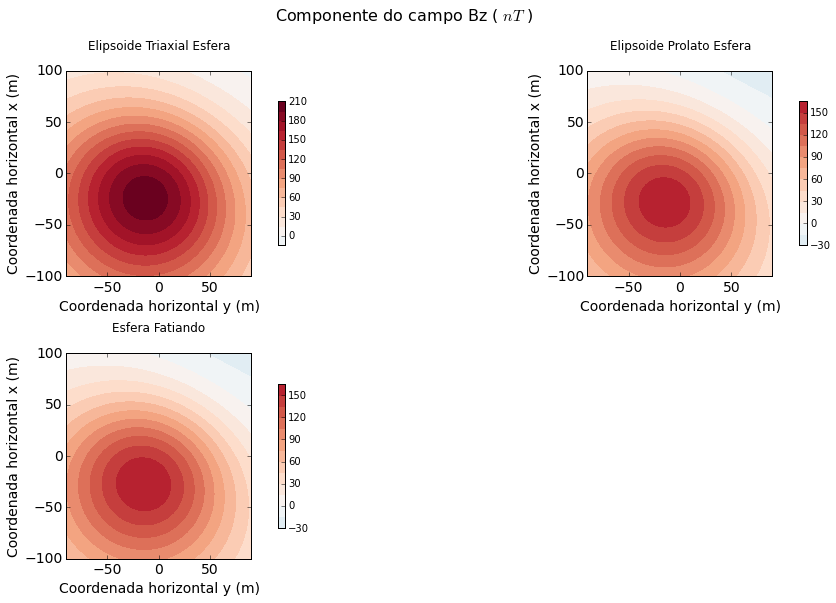

In [21]:
rangesBz = np.max(np.abs([np.max(Bz), np.min(Bz),
                          np.max(Bz2), np.min(Bz2),
                          np.max(Bz3), np.min(Bz3)]))

plt.figure(figsize=(15,8))

plt.suptitle('Componente do campo Bz ( $nT$ )',y=1.04, fontsize=16, x=0.55)

plt.subplot(2,2,1)
plt.title('Elipsoide Triaxial Esfera', y=1.08)
plt.axis('scaled')
mpl.contourf(Yp,Xp,Bz,shape,15,
            vmin = -rangesBz, vmax = rangesBz,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.subplot(2,2,2)
plt.title('Elipsoide Prolato Esfera', y=1.08)
plt.axis('scaled')
mpl.contourf(Yp,Xp,Bz2,shape,15,
            vmin = -rangesBz, vmax = rangesBz,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.subplot(2,2,3)
plt.title('Esfera Fatiando', y=1.08)
plt.axis('scaled')
mpl.contourf(Yp,Xp,Bz3,shape,15,
            vmin = -rangesBz, vmax = rangesBz,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.tight_layout()

plt.show()

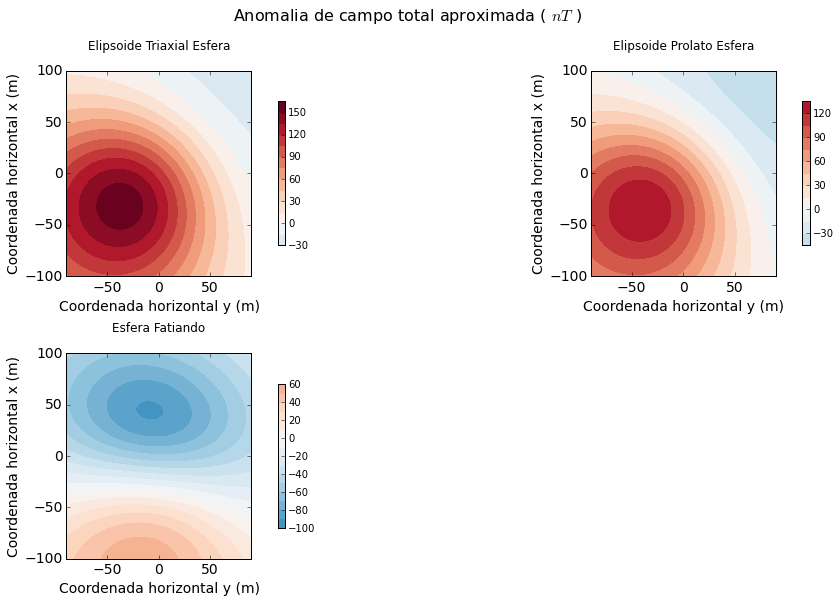

In [22]:
rangesTf = np.max(np.abs([np.max(Tf), np.min(Tf),
                          np.max(Tf2), np.min(Tf2),
                          np.max(Tf3), np.min(Tf3)]))

plt.figure(figsize=(15,8))

plt.suptitle('Anomalia de campo total aproximada ( $nT$ )',y=1.04, fontsize=16, x=0.55)

plt.subplot(2,2,1)
plt.title('Elipsoide Triaxial Esfera', y=1.08)
plt.axis('scaled')
mpl.contourf(Yp,Xp,Tf,shape,15,
            vmin = -rangesTf, vmax = rangesTf,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.subplot(2,2,2)
plt.title('Elipsoide Prolato Esfera', y=1.08)
plt.axis('scaled')
mpl.contourf(Yp,Xp,Tf2,shape,15,
            vmin = -rangesTf, vmax = rangesTf,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.subplot(2,2,3)
plt.title('Esfera Fatiando', y=1.08)
plt.axis('scaled')
mpl.contourf(Yp,Xp,Tf3,shape,15,
            vmin = -rangesTf, vmax = rangesTf,
            cmap=plt.cm.RdBu_r)
cb = plt.colorbar(shrink=0.7)
plt.xlim(ymin,ymax)
plt.ylim(xmin,xmax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Coordenada horizontal y (m)', fontsize=14)
plt.ylabel('Coordenada horizontal x (m)', fontsize=14)

plt.tight_layout()

plt.show()